# Decision Tree

데이터에 내재되어 있는 패턴을 변수의 조합으로 나타내는 예측/분류 모델을 나무의 형태로 만드는 것. (교수님 유튜브 강의 중...)<br>
$\rightarrow$ 데이터를 가장 순수하게 분류할 수 있는 변수 및 조건을 기준으로 데이터의 공간을 분할하는 모델. (내가 한 말...)

### Shape of Model

<img src="img/DT_01_tree.PNG">
<br>
* 데이터를 2개 혹은 그 이상의 부분집합으로 분할

$\rightarrow$ 데이터가 균일해지도록 분할. 이 때 균일하다는 것은 분할을 통해 비슷한 범주를 가진 관측치들끼리 모으는 것을 의미한다.

<img src="img/DT_02_tree.PNG">

다음과 같은 데이터가 주어졌다고 하자.

Root Node 뿐만 아니라 모든 Node에서는 가장 균일하게 분할 할 수 있는 변수를 사용해야한다. 

차가운 물, 당분 섭취, 스트레스 각각 요인에 따른 복통 발생여부를 다음과 같이 나타낼 수 있다. (** 공간 상 스트레스는 생략)

<img src="img/DT_03_tree.PNG">

차가운 물이나 당분 섭취 여부로 분할하였지만 그 어느 것도 100% 균일하게 나누어지지 않았다. 이런 것을 impure 하다고 표현한다.

하지만 여기서 가장 pure하게 나눈 변수를 찾아야하기 때문에 impurity를 측정하는 기법을 사용하게 된다.

보통 두 가지가 알려져있는데 각각은
<b>
    
1) Gini Impurity <br>
2) Information Gain Entropy </b>


...이다.

### Gini Impurity

Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.

$\rightarrow$ 지니 불순도(Gini impurity)는 만일 subset의 레이블 분포에 따라서 임의로 레이블이 지정된 경우, 데이터셋에서 임의로 선택된 element가 얼마나 오분류(incorrectly labeled)되는지를 측정한 것이다. 

(출처: https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity)

Gini Impurity = 1 - (the probability of YES)$^2$ - (the probability of NO)$^2$

* 차가운 물 분할 시 Gini Impurity <br>
$1 - ({105 \over {105+39}})^2 - ({39 \over {105+39}})^2 = 0.395$ <br>
$1 - ({125 \over {125+34}})^2 - ({34 \over {125+34}})^2 = 0.336$ <br><br>
<b>Weighted Average of the Leaf Node impurity </b><br>
$({144 \over {144+159}})*0.395 + ({159 \over {144+159}})*0.336 = 0.364$ <br><br>



* 당분 섭취 분할 시 Gini Impurity <br>
$1 - ({120 \over {120+24}})^2 - ({24 \over {120+24}})^2 =0.394$<br>
$1 - ({20 \over {139+20}})^2 - ({139 \over {139+20}})^2 = 0.220$<br><br>
<b>Weighted Average of the Leaf Node impurity </b><br>
$({144 \over {144+159}})*0.394 + ({159 \over {144+159}})*0.220 = 0.303$ <br><br>

스트레스 분할 시 Weighted Average of the Leaf Node Impurity가 0.4라고 가정했을 때,
<b>당분 섭취</b>의 경우 계산되는 <span style="color:blue">지니 불순도가 가장 낮으므로 지금 Node에서 제일 균일하게 분할하는 변수</span> 라고 할 수 있다.

<span style="color:red"><b>!! Numerical Data의 경우에는 Gini Impurity를 구하는 방법이 다르다. </b></span>

아래와 같은 데이터가 주어졌다고 가정했을 때, Gini Impurity는 다음과 같이 진행된다.
<img src="img/DT_05_tree.PNG">
Step 1) 데이터를 오름차순으로 정렬한다. <br>
Step 2) 인접한 데이터 간의 평균(붉은색 글씨)을 구한다.<br>
Step 3) 계산한 평균을 기준으로 분할하여 Gini Impurity를 구한다. (아래) <br>
<br>
Gini Impurity for "수면시간(분) < 136.5" $\rightarrow$ 0.41<br>
Gini Impurity for "수면시간(분) < 186.5" $\rightarrow$ <b>0.25 (가장 낮음)</b><br>
Gini Impurity for "수면시간(분) < 215.0" $\rightarrow$ 0.44<br>
Gini Impurity for "수면시간(분) < 332.0" $\rightarrow$ ....<br>
Gini Impurity for "수면시간(분) < 512.0" $\rightarrow$ ....<br>

따라서 <b>"수면시간(분) < 186.5"</b>이 <span style="color:blue">지금 Node에서 제일 균일하게 분할하는 변수</span>라고 할 수 있다.


 이외에 Rank Data 또는 Category Data의 경우 해당 랭크끼리 묶어서 분할을 진행하면 된다.
<br><br>
<span style="color:red"><b> !! 마지막으로 분할한 뒤의 지니 불순도가 분할하지 않은 경우보다 더 높면 해당 Node를 Leaf로 처리한다.</b></span>

 ### Information Gain Entropy

Entropy는 "무질서의 정도"를 나타내는 개념이다.<br>
데이터의 Impurity가 높을 수록 Entropy도 커진다.<br> 
Entropy를 계산하는 식은 아래와 같다.

 $ Entropy(A) = -\sum^{m}_{k=1}p_k\log_2(p_k)$

Gini Impurity에서 사용했던 수면시간(분) 자료를 예시로 들어보면 아래와 같다.

분할하기 이전 노드의 Entropy 값은 아래와 같다.<br>
$Entropy($A$)  = -{2\over6}\log_{2}({2\over6}) -{4\over6}\log_{2}({4\over6})\approx 0.918$

수면시간 186.5분을 기준으로 분할 할 경우<br>

R1지역은 Yes가 둘 No가 없음<br>
R2지역은 Yes가 하나 No가 셋이므로...<br>

$Entropy($R1$)  = -{2\over2}\log_{2}({2\over2}) -{0\over2}\log_{2}({0\over2})\approx 0.000 $ <br>
$Entropy($R2$)  = -{3\over4}\log_{2}({3\over4}) -{1\over4}\log_{2}({1\over4})\approx 0.811$


따라서!<br> 
$Entropy($R1$) * 0.25 + Entropy($R2$) * 0.75 \approx 0.608$<br>
...이다.

수면시간 186.5분을 기준으로 분할하였을 때 이전 노드의 Entropy 값을 가장 많이 줄여주기 때문에 186.5분을 기준으로 분할한다.

여기서 상위 노드(A)와 하위노드(R1, R2)간 Entropy 값의 차이를 Information Gain(정보이득)이라고 한다. 

Information Gain Entropy를 사용할 경우 이 정보이득을 극대화하는 방향으로 분할이 진행된다.



# Regression Tree

Regression Tree는 각 Leaf Node가 Numeric한 값을 갖는다.

<img src="img/RT_01_tree.PNG">

Regression Tree는 Impurity 계산에 <b>"Residual의 제곱의 합"</b>을 이용한다.

RSS(Residual Sum of Squares) = (0 - 0)$^2$ + { (0 - 38.8)$^2$ + (0 - 38.8)$^2$ + (0 - 38.8)$^2$ + (5 - 38.8)$^2$ + $\dots$ }

이 RSS를 가장 작게하는 평균을 기준으로 분할하게 된다.

<img src="img/RT_02_tree.PNG">

첫 번째 분할이 끝나면 Region은 다음과 같이 재지정(R1, R2)된다. 

이제 두 번째 분할을 시도해보자. 위에서 진행했던 것처럼 R1과 R2에 대해서 Impurity를 계산한 뒤 각각의 Region에 맞는 분할선을 지정해주면된다.

여기서 생각해볼 점이 있다.

만일 분할을 끝까지 진행한다면 하나의 데이터가 하나의 Region을 갖는 Overfitting Problem이 발생할 수 있다.

따라서 <span style="color:blue">분할 후 재지정된 Region에 <u>일정 개수 미만의 데이터가 포함</u>되는 경우에는 <b>해당 Region을 Leaf Node로 처리하여 분할을 중단<b></span>하는 것이 필요하다.



### How to handle overfitting problem?

<b>Idea 1 :::</b> Cross Validation을 사용하여 가장 최적의 subtree를 찾는다.
<br>$\rightarrow$ 너무 많은 경우의 수가 존재하기 때문에 진행이 어렵다.

<b>Idea 2 :::</b> 새로운 분할을 하더라도 일정 수준 이상 RSS를 낮추지 못할 때 Tree의 성장을 중지한다.
<br>$\rightarrow$ 하지만 탐욕 알고리즘(greedy algorithm)이기 때문에 우선 Bad cut을 진행해야 Good cut을 얻을 수 있다.

<b>Idea 3 :::</b> 일단 나무를 크게 키운 후 Leaf부터 Root까지 가지치기를 한다. 
<br>$\rightarrow$ 이 방법이 가장 적합하다. Weakest Link Pruning과 Cost-Complexity function을 사용하며 자세한 설명은 아래에 있다.

#### Cost-Complexity Pruning (비용-복잡도 가지치기)

이는 다시 말해서 <span style="color:red"><b>Cost-Complexity Function을 사용</b></span>해서 <span style="color:red"><b>Weakest Link를 찾은 다음</b></span> 해당 Link(노드)에서 <span style="color:red"><b>Pruning 하는 것이다.</b></span>

회귀나무에서 쓰는 Cost-Complexity Function은 아래와 같다.

$R_{\alpha}(T) = R(T) + \alpha*|f(T)|$

($|f(T)|$는 Tree의 Leaf 개수 )

<br>

여기서 $R(T)$는 <u>각 Region의 RSS를 더한 값</u>으로 아래와 같다.

$\sum_{i:x_i \in R_m}(y_i - \overline{\rm y}_{R_m})^2 $

가지치기를 할 때 이 Cost-Complexity Function으로 Tree 간의 차이를 구하게 된다.

$R_{\alpha}(T - T_t) - R_{\alpha}(T)$ = $\ulcorner$Pruned Tree's Cost-Complexity$\lrcorner$ $-$ $\ulcorner$Full Tree's Cost-Complexity$\lrcorner$

= $R(T - T_t) - R(T) + \alpha(|f(T-T_t| - f|T|)$ 

= $R(t) - R(T_t)  + \alpha(1 - |f(T_t)|)$

따라서 두 값의 차이가 0 일 때의 $\alpha$를 $\alpha'$라고 하면

$\alpha' = {{R(t) - R(T_t)}\over{|f(T_t)-1|}}$ 이다.

$\alpha$'는 <b>"개별노드($t$)와 트리($T_t$)의 Error 차이"</b>와 <b>"트리($T_t$)와 개별노드($t$)간의 복잡도(Complexity) 차이"</b>의 비율이다.

#### How pruning algorithm works?

Pruning은 처음에 Full Tree로 시작을 한다.

Full Tree는 Penalty parameter($\alpha$)가 0인 상황에서 생성되므로 당연히 $\alpha = 0$에서 시작을 한다.

첫 번째 단계에서는 $\alpha'$ 즉 $g_{1}(t) = {{R(t) - R(T^{1}_{t})} \over {|f(T^{1}_{t})|-1}}$ 을 최소화할 수 있는 subtree를 찾아서 pruning 하는 것이 목표이다.

Let $t_1$ be this node.

Let $\alpha^2 = g_1(t_1)$ and $T^{2} = T^{1} - T^{1}_{t_1}$

#### example

<img src="img/RT_03_tree.PNG">

우선 Full Tree로 시작하기 때문에 $\alpha^{(1)} = 0$으로 둔다.

| $t$ | $R(t)$ | $R(T_t)$ | $g(t)$ |
| --- | --- | --- | --- |
| $t_1$ | ${{8\over16}*{16\over16}} = {8 \over 16}$ | $R(T_{t_1}) = 0$ | ${{8/16 - 0} \over {4 - 1}} = {1 \over 6}$ |
| $t_2$ | ${4\over12}*{12\over16} = {4\over16}$ | $R(T_{t_2}) = 0$ | ${{4/16 - 0} \over {3 - 1}} = {1 \over 8}$ |
| $t_2$ | ${2\over6}*{6\over16} = {2\over16}$ | $R(T_{t_3}) = 0$ | ${{2/16 - 0} \over {3-1}} = {1 \over 8}$ |

Full Tree에서 각 Internal Node들 중 <span style="color:red">가장 작은 $g(t)$를 가지는 Node</span>를 찾으면 된다.

표를 보면 Node $t_2$와 $t_3$의 값이 가장 작다.

이렇게 가장 낮은 값이 두 개 일 때에는 더 적은 Child Node를 가진 Internal Node를 Prune한다.

따라서 $t_3$에서 가지치기(prune)를 하게되며 $\alpha^{(2)}$의 값은 $1\over8$이 된다.

<span style="color:blue"><b>!! 근데 여기서 왜 가장 낮은 $g(t)$를 찾아야하는지 의문이 든다.</b> <br>
$\rightarrow$ 왜냐하면 가장 낮은 $g(t)$를 갖는 Node가 Weakest-Link이기 때문이다.</span>

모든 Node t에 대해서 $t \in T_1$가 성립하고, $R_\alpha(t) = R(t) + \alpha$라고 할 수 있다.

모든 Subtree $T_t$에 대해서 $ R_{\alpha}(T_t) = R(T_t) + \alpha|\tilde{T}_t|$라고 할 수 있다.

이 때 $\alpha$ 값이 점점 커지는 상황에서 두 함수의 그래프를 그리면 보통 다음과 같은 모습을 보인다.

<img src="img/RT_05_tree.PNG">

만약 해당 Node에서 분할한 것보다($ R_{\alpha}(T_t)$) 분할 하지 않은 것($R_\alpha(t)$)의 Cost-Complexity가 더 낮다면 굳이 분할 해야할 이유가 없어진다.

$\alpha$값을 높이다보면 가장 먼저 $R_\alpha(t) = R_\alpha(T_t)$를 만족하는 node가 나온다.

그렇다면 그 node가 주어진 Tree에서 Weakest Link이다.

따라서 $\alpha_2 = g_{1}(t_{3})$이 된다. 

$\alpha_2$에 따른 최적의 Subtree를 갖기 위해서는 $t_3$의 child node를 제거하면 된다.

$\alpha$가 증가하면서 $t_3$은 가지를 뻗는 것보다 그냥 Leaf로 남아있는게 좋을 첫 번째 node가 될 것이다.<br>
만약에 $R_\alpha(t) = R_\alpha(T_t)$를 만족하는 node가 여러 개 존재한다면 똑같이 제거를 하면 된다.

$\alpha_1 \leq \alpha < \alpha_2$의 범위에 있는 $\alpha$가 적용되는 가장 작은 subtree는 $T_1$과 같다.

$t_3$을 가지치기한 뒤의 그래프는 다음과 같다.

<img src="img/RT_04_tree.PNG">

여기서 다시 위의 과정을 반복하면 된다.

하나의 Node가 남을 때까지 반복을 하면 다음과 같은 결과를 얻게 된다. <br>
$\alpha^{(0)} = 0$,  $\alpha^{(1)} = {1 \over 8}$,  $\alpha^{(2)} = {1 \over 8}$,  $\alpha^{(3)} = {1 \over 4}$

여러 $\alpha$ 값 중 cost-complexity를 최소화 할 수 있는 것을 고르기 위해서 Cross-Validation을 진행한다.

\[ Cross Validation, the right way \]

1. Split the training points into 10 folds.


2. For k = 1, ..., 10, using every fold except the $k$th:
    - Construct a sequence of trees $T_1$, ..., $T_m$ for a range of values of $\alpha$, and find the prediction of each region in each one.
    - For each tree $T_i$, calculate the RSS on the test set.
    
 
3. Select the parameter $\alpha$ that minimizes the average test error.

<i>Note:</i> We are doing all fitting, including the construction of the trees, using only the training data.

## Apply Algorithm to Data

In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.externals.six import StringIO 
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

import pydot 

import graphviz 
from sklearn import tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

C:\Users\aa\Anaconda3\envs\dmqa_pytorch\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
iris = datasets.load_iris()
X = iris.data#[:, :2]
y = iris.target

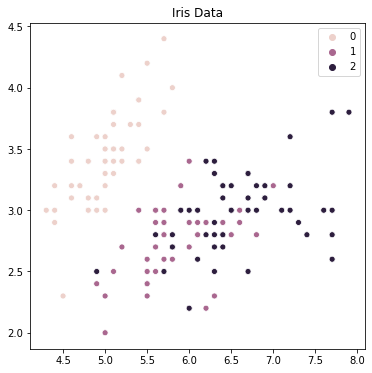

In [3]:
plt.figure(figsize = (6,6))
sns.scatterplot([_[0] for _ in X], [_[1] for _ in X], hue = y)
plt.title('Iris Data')
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Decision Tree

In [5]:
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [9]:
dot_data = StringIO() 
tree.export_graphviz(model_tree, out_file=dot_data, feature_names=iris.feature_names) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) [0]
graph.write_jpeg('DT_07_tree.jpeg')

<img src="img/DT_99_tree.jpeg">

In [10]:
model_tree.feature_importances_

array([0.01256535, 0.05507159, 0.55087649, 0.38148656])

In [11]:
np.mean(cross_val_score(model_tree, iris.data, iris.target, cv=10))

0.9533333333333334

### CART (Classification And Regression Tree)

In [2]:
dfh = pd.read_csv('./data/house_train.csv')
house_test = pd.read_csv('./data/house_test.csv')

In [3]:
dfh.drop('Id', axis = 1, inplace = True)

In [4]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [5]:
# 데이터타입 별 칼럼 구분
col_number = dfh.dtypes[(dfh.dtypes != object)].index
col_object = dfh.dtypes[(dfh.dtypes == object)].index

In [6]:
#NaN 값이 있는 Columns
col_number_nan = [c for c in col_number if dfh[c].isnull().values.any() == True] 
col_object_nan = [c for c in col_object if dfh[c].isnull().values.any() == True] 
print("number_nan : ", col_number_nan)
print("object_nan : ", col_object_nan)

number_nan :  ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
object_nan :  ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


<b>LotFrontage: Linear feet of street connected to property ::: 없는 경우 NA (추측)</b>

Alley: Type of alley access to property ::: 없는 경우 NA

MasVnrType: Masonry veneer type ::: 없는 경우 NA

MasVnrArea: Masonry veneer area in square feet ::: 없는 경우 NA

BsmtQual: Evaluates the height of the basement ::: 없는 경우 NA

BsmtCond: Evaluates the general condition of the basement ::: 없는 경우 NA

BsmtExposure: Refers to walkout or garden level walls ::: 없는 경우 NA

BsmtFinType1: Rating of basement finished area ::: 없는 경우 NA

BsmtFinType2: Rating of basement finished area (if multiple types) ::: 없는 경우 NA

<b>Electrical: Electrical system ::: 결측치</b>

FireplaceQu: Fireplace quality ::: 없는 경우 NA

GarageType: Garage location ::: 없는 경우 NA

GarageYrBlt: Year garage was built ::: 없는 경우 NA

GarageFinish: Interior finish of the garage ::: 없는 경우 NA

GarageQual: Garage quality ::: 없는 경우 NA

GarageCond: Garage condition ::: 없는 경우 NA

PoolQC: Pool quality ::: 없는 경우 NA

Fence: Fence quality ::: 없는 경우 NA

MiscFeature: Miscellaneous feature not covered in other categories ::: 없는 경우 NA

object 결측치는 No<br>
!object 결측치는 0으로 처리한다.

In [7]:
dfh.Electrical.isna().value_counts()

False    1459
True        1
Name: Electrical, dtype: int64

In [8]:
dfh.LotFrontage.isna().value_counts()

False    1201
True      259
Name: LotFrontage, dtype: int64

In [9]:
dfh[col_number_nan] = dfh[col_number_nan].fillna(0)
dfh[col_object_nan] = dfh[col_object_nan].fillna('No')

In [10]:
# 결측치가 이제 없다.
dfh.isna().values.any()

False

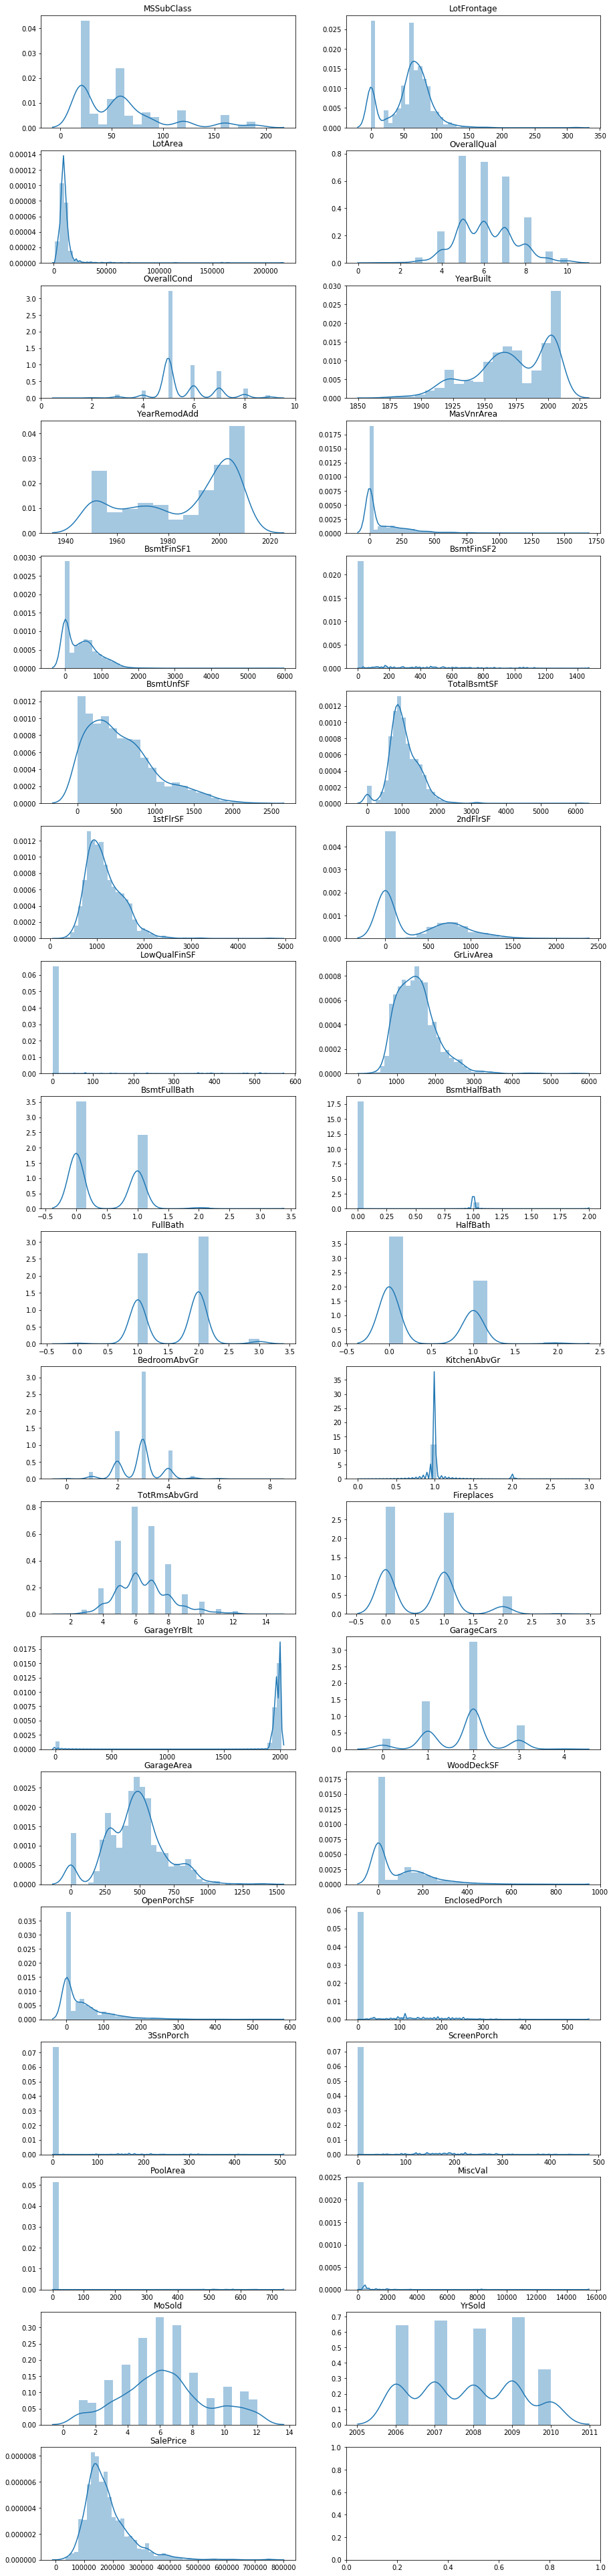

In [39]:
fig, axs = plt.subplots(ncols=2, nrows=19, figsize=(15,70))
for i, c in enumerate(col_number):
    sns.distplot(dfh[c].values, ax=axs[i//2,i%2])
    axs[i//2,i%2].set_title(c)
plt.show()

In [86]:
# SalePrice와의 상관관계가 0.6이 넘는 numeric columns 추출
col_number_selected =\
list(dict(
    filter(lambda x: x[1] == True, 
           dict(dfh[col_number].corr()['SalePrice'].apply(np.abs) > 0.6).items()
          )
).keys())[:-1]

col_number_selected

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageCars',
 'GarageArea']

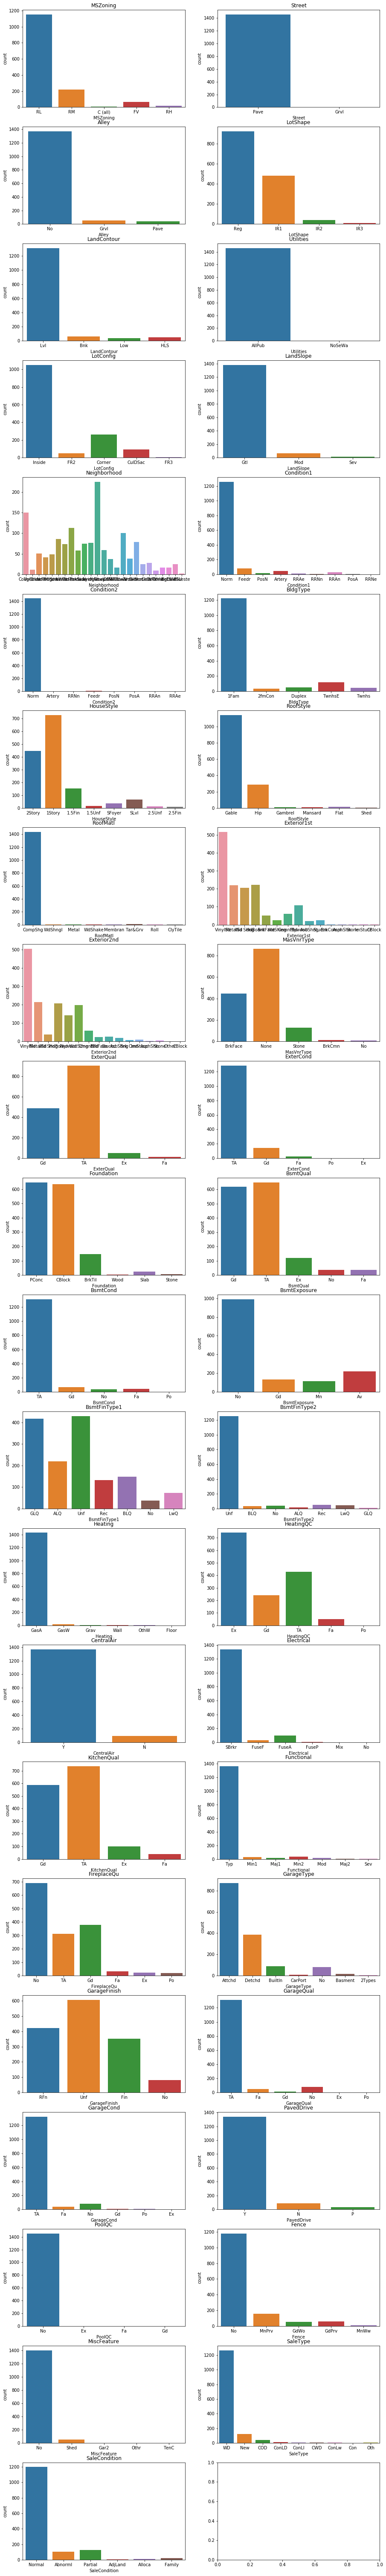

In [98]:
fig, axs = plt.subplots(ncols=2, nrows=22, figsize=(15,110))
for i, c in enumerate(col_object):
    sns.countplot(dfh[c], ax=axs[i//2,i%2])
    axs[i//2,i%2].set_title(c)
plt.show()

In [238]:
df_object_selected = pd.DataFrame()
df_object_selected['MSZoning_new'] = LabelEncoder().fit_transform(dfh['MSZoning'])
df_object_selected['Neighborhood_new'] = LabelEncoder().fit_transform(dfh['Neighborhood'])
df_object_selected['LotShape'] = LabelEncoder().fit_transform(dfh['LotShape'])
df_object_selected['GarageFinish'] = LabelEncoder().fit_transform(dfh['GarageFinish'])
df_object_selected['BsmtFinType1'] = LabelEncoder().fit_transform(dfh['BsmtFinType1'])

In [239]:
X_train, X_test, y_train, y_test = train_test_split(
    pd.merge(dfh[col_number_selected], df_object_selected, how = 'left', right_index = True, left_index = True),
    dfh[dfh.columns[-1]], test_size=0.25, random_state=42)

In [240]:
model_tree = DecisionTreeRegressor(random_state=42, max_depth=8)
model_tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [241]:
print(mean_squared_error(y_test, model_tree.predict(X_test), multioutput='raw_values')[0])

1237767194.7837222


In [228]:
dot_data = StringIO() 
tree.export_graphviz(model_tree, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
graph.write_jpeg('RT_97_tree.jpeg')

<img src="img/RT_97_tree.jpeg">

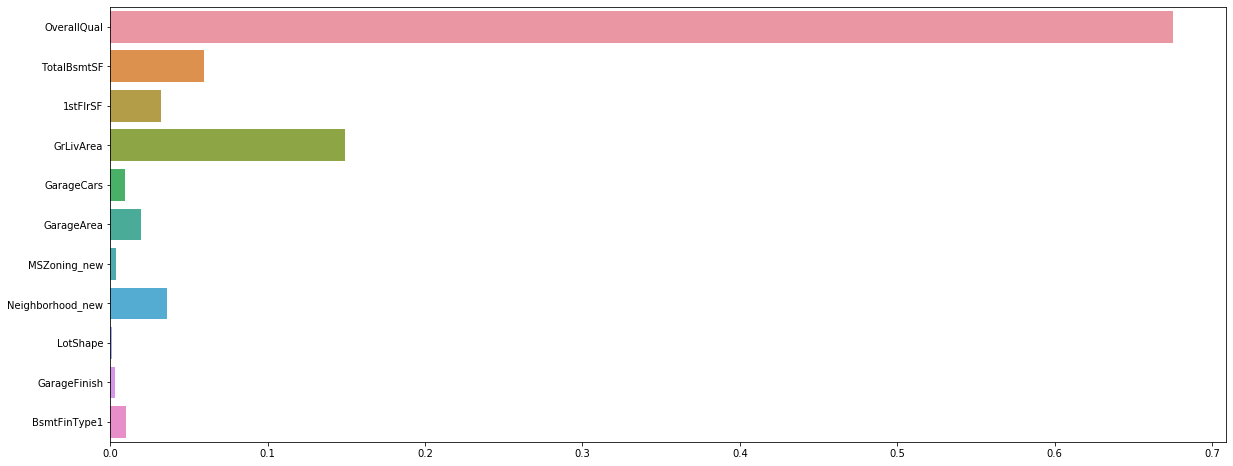

In [251]:
plt.figure(figsize=(20,8))
sns.barplot(y = list(col_number_selected) + list(df_object_selected.columns),
           x = model_tree.feature_importances_)
plt.show()

# Submission

In [244]:
house_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,No,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,6,2010,WD,Normal,119500.000000
1,1462,20,RL,81.0,14267,Pave,No,IR1,Lvl,AllPub,...,0,No,No,Gar2,12500,6,2010,WD,Normal,183314.285714
2,1463,60,RL,74.0,13830,Pave,No,IR1,Lvl,AllPub,...,0,No,MnPrv,No,0,3,2010,WD,Normal,256000.000000
3,1464,60,RL,78.0,9978,Pave,No,IR1,Lvl,AllPub,...,0,No,No,No,0,6,2010,WD,Normal,209550.000000
4,1465,120,RL,43.0,5005,Pave,No,IR1,HLS,AllPub,...,0,No,No,No,0,1,2010,WD,Normal,224728.000000


In [234]:
# 데이터타입 별 칼럼 구분
tcol_number = house_test.dtypes[(house_test.dtypes != object)].index
tcol_object = house_test.dtypes[(house_test.dtypes == object)].index

#NaN 값이 있는 Columns
tcol_number_nan = [c for c in tcol_number if house_test[c].isnull().values.any() == True] 
tcol_object_nan = [c for c in tcol_object if house_test[c].isnull().values.any() == True] 
print("tnumber_nan : ", tcol_number_nan)
print("tobject_nan : ", tcol_object_nan)

house_test[tcol_number_nan] = house_test[tcol_number_nan].fillna(0)
house_test[tcol_object_nan] = house_test[tcol_object_nan].fillna('No')

df_object_selected = pd.DataFrame()
df_object_selected['MSZoning_new'] = LabelEncoder().fit_transform(house_test['MSZoning'])
df_object_selected['Neighborhood_new'] = LabelEncoder().fit_transform(house_test['Neighborhood'])
df_object_selected['LotShape'] = LabelEncoder().fit_transform(house_test['LotShape'])
df_object_selected['GarageFinish'] = LabelEncoder().fit_transform(house_test['GarageFinish'])
df_object_selected['BsmtFinType1'] = LabelEncoder().fit_transform(house_test['BsmtFinType1'])

tnumber_nan :  ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']
tobject_nan :  ['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [243]:
house_test['SalePrice'] = \
model_tree.predict(pd.merge(house_test[col_number_selected],df_object_selected, how = 'inner', right_index = True, left_index=True))

house_test[['Id', 'SalePrice']].to_csv('SUBMIT_20191007_01.csv', index=False)

Root Mean Squared Logarithmic Error ::: 0.25320